In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pollution = pd.read_csv('./../../data/visualization/pollution_wide.csv')

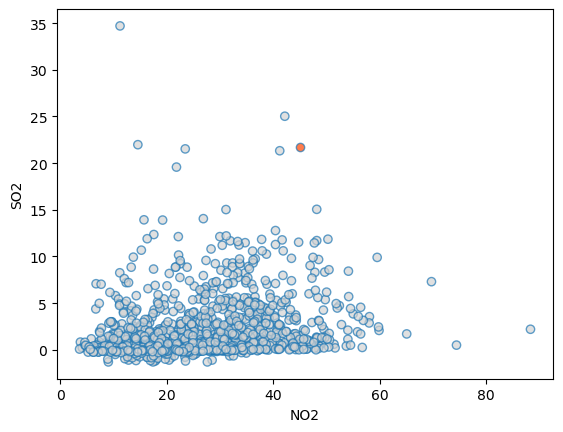

In [11]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

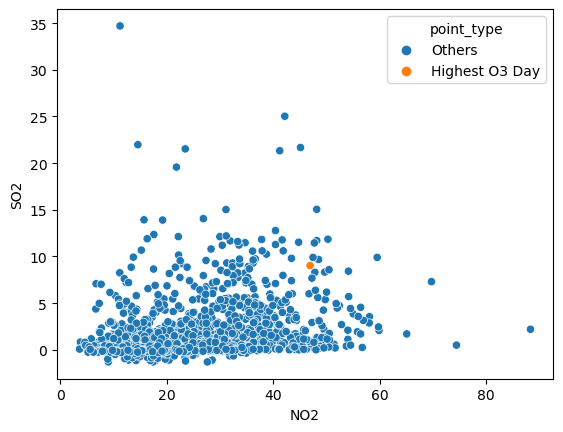

In [12]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()


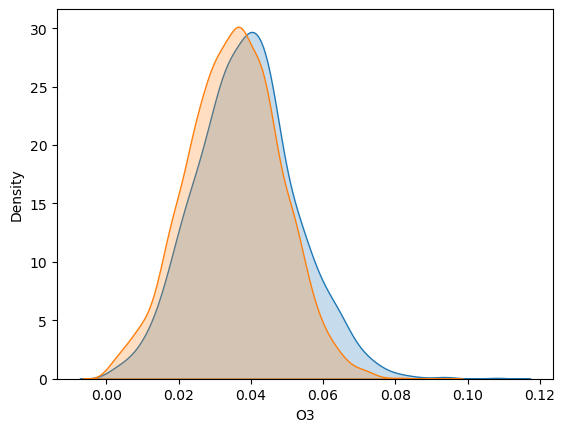

In [15]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            #shade = True, ##`shade` is now deprecated in favor of `fill`; setting `fill=True`.
            fill=True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            fill = True,
            label = 'other years')
plt.show()

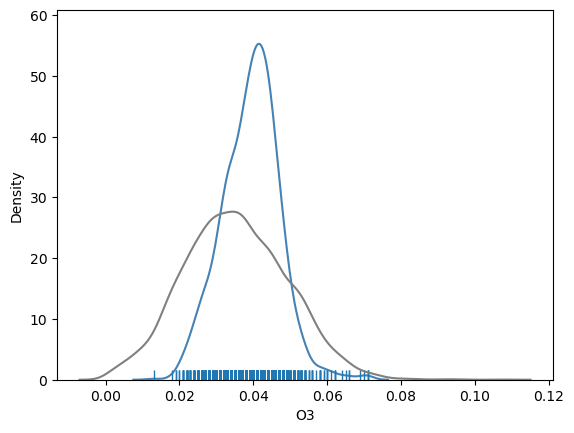

In [24]:
## `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
#sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
#             label = 'Vandenberg', 
#             # Turn off the histogram and color blue to stand out
#             hist = False,
#             color = 'steelblue', 
#             # Turn on rugplot
#             rug = True)
#
#sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
#             label = 'Other cities',
#             # Turn off histogram and color gray
#             hist = False,  
#             color = 'gray')

# Translated into a kdeplot and a rugplot
sns.kdeplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
            label = 'Vandenberg', 
             color = 'steelblue' 
           )
sns.rugplot(pollution[pollution.city == 'Vandenberg Air Force Base'], x="O3")

sns.kdeplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
            label = 'Other cities', 
             color = 'gray' 
           )
plt.show()

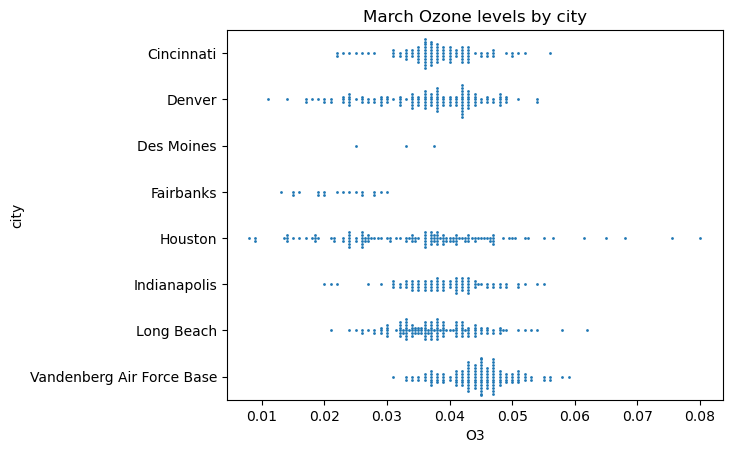

In [27]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              #size = 3)
            ## size = 3 : gives a warning, decreasing size again
              size = 2)
              
# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

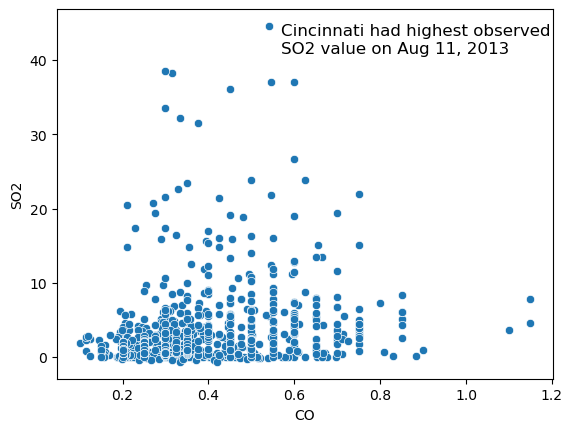

In [28]:
# Draw basic scatter plot of pollution data for August
#pollution.head()
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


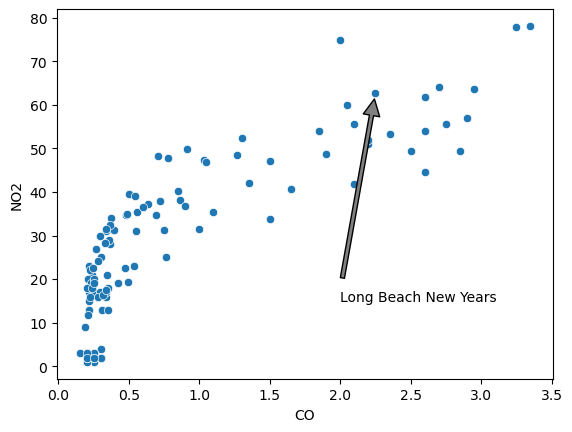

In [32]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")

lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")
#lb_newyears.head()

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': .03},
             backgroundcolor = 'white')
plt.show()

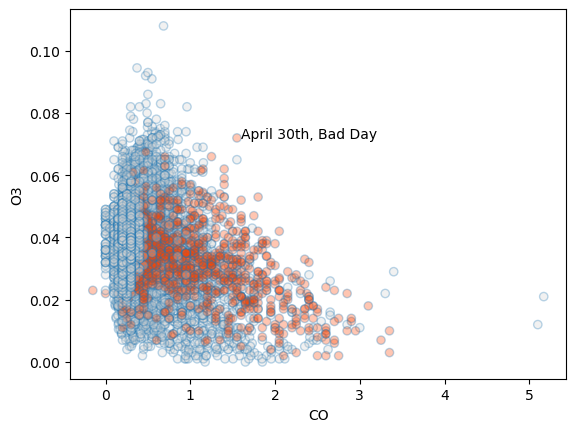

In [34]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show()